In [1]:
import pandas as pd

# Load the dataset from the Excel file
data_path = '/Users/sakshiagarwal/Documents/Capstone/Prediction Data.xlsx'
data = pd.read_excel(data_path)

# Display the first few rows of the dataset and the column names to understand its structure
data.head(), data.columns

(   Year  Ad service sales(billions)  Net Income(billions)  \
 0  2023                       46.90                30.425   
 1  2022                       37.75                -2.722   
 2  2021                       31.16                33.364   
 3  2020                       12.33                21.331   
 4  2019                         NaN                11.588   
 
    Subcription service sales(billions)  \
 0                                40.21   
 1                                35.22   
 2                                31.77   
 3                                25.21   
 4                                19.22   
 
    Third-party seller services sales(billions)  Net Sales(billions)  \
 0                                       140.05               574.78   
 1                                       117.66               513.97   
 2                                       103.37               469.82   
 3                                        80.45               318.07   
 4    

Mean Squared Error: 0.0005834312039013357


/var/folders/82/fy78f_hn1w5747dj39n32s5c0000gn/T/ipykernel_93427/1650594998.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


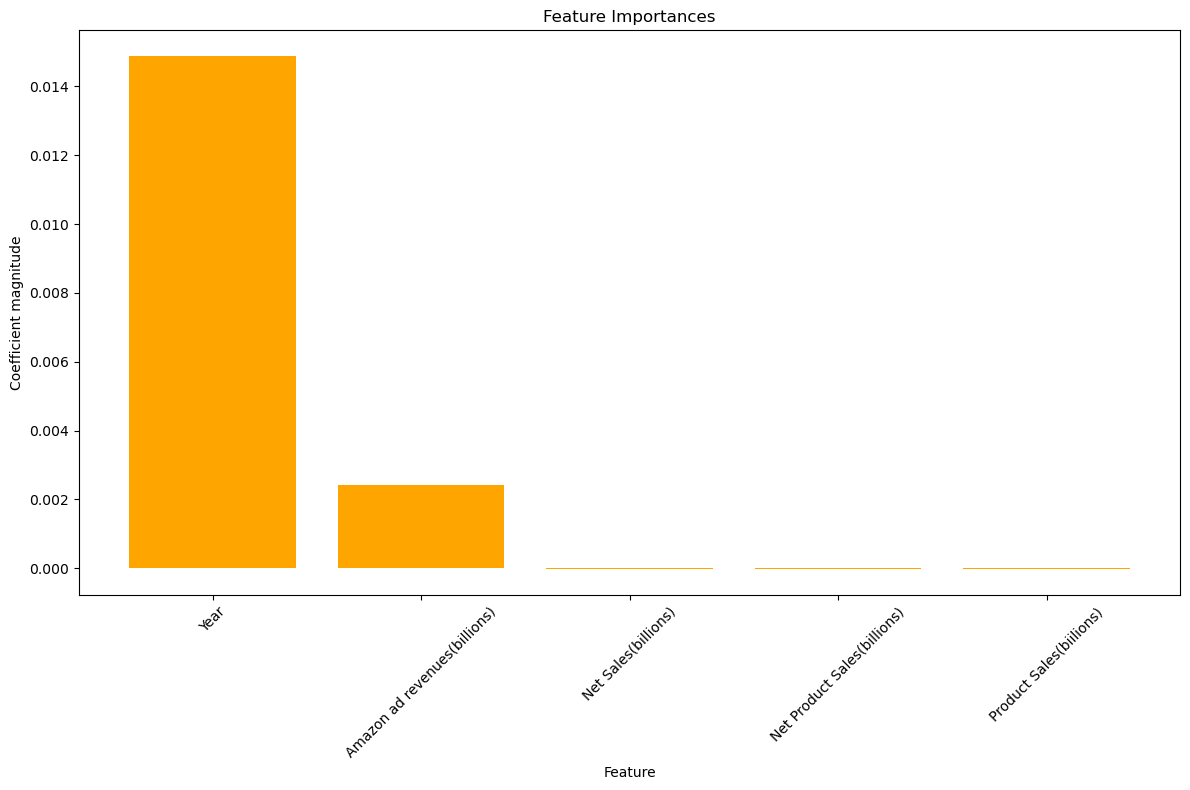

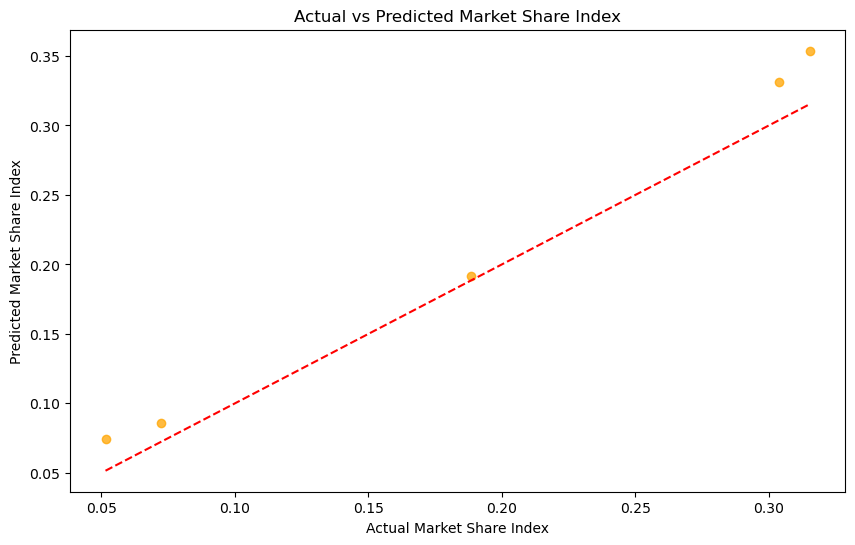

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/Users/sakshiagarwal/Documents/Capstone/Prediction Data.xlsx'
data = pd.read_excel(data_path)

# Strip extra whitespace from the column names
data.columns = data.columns.str.strip()

# Define the market share index
data['Market Share Index'] = data['North America Sales(billions)'] / data['E-commerce Sales(billions)']

# Define features including 'Year'
features = ['Year', 'Net Sales(billions)', 'Net Product Sales(billions)', 'Product Sales(biilions)','Amazon ad revenues(billions)']
X = data[features]
y = data['Market Share Index']

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature importance for Linear Regression can be derived from the coefficients
coefficients = model.coef_
features_importance = zip(features, coefficients)
sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))  # Increased figure size for clarity
plt.title('Feature Importances')
features_sorted, importance_sorted = zip(*sorted_features)
plt.bar(features_sorted, importance_sorted, align='center', color='orange')
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

# Visualization of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='orange')  # alpha helps to see overlapping data
plt.xlabel('Actual Market Share Index')
plt.ylabel('Predicted Market Share Index')
plt.title('Actual vs Predicted Market Share Index')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [3]:
import numpy as np

# Project future values for the features
latest_year = X['Year'].max()
future_years = np.arange(latest_year + 1, latest_year + 6)

# Assume linear growth for projections, replace with your own method
future_projection = pd.DataFrame({
    'Year': future_years,
    'Net Sales(billions)': np.linspace(X['Net Sales(billions)'].iloc[-1], X['Net Sales(billions)'].iloc[-1] * 1.1, 5),
    'Net Product Sales(billions)': np.linspace(X['Net Product Sales(billions)'].iloc[-1], X['Net Product Sales(billions)'].iloc[-1] * 1.1, 5),
    'Product Sales(biilions)': np.linspace(X['Product Sales(biilions)'].iloc[-1], X['Product Sales(biilions)'].iloc[-1] * 1.1, 5),
    'Amazon ad revenues(billions)': np.linspace(X['Amazon ad revenues(billions)'].iloc[-1], X['Amazon ad revenues(billions)'].iloc[-1] * 1.1, 5),
})

# Predict the market share index for the projected years
future_projection['Predicted Market Share Index'] = model.predict(future_projection[features])

# Output the projections
print(future_projection)

   Year  Net Sales(billions)  Net Product Sales(billions)  \
0  2024               5.2600                   136.619231   
1  2025               5.3915                   140.034712   
2  2026               5.5230                   143.450192   
3  2027               5.6545                   146.865673   
4  2028               5.7860                   150.281154   

   Product Sales(biilions)  Amazon ad revenues(billions)  \
0               803.125000                      7.721312   
1               823.203125                      7.914345   
2               843.281250                      8.107378   
3               863.359375                      8.300411   
4               883.437500                      8.493444   

   Predicted Market Share Index  
0                      0.342554  
1                      0.356981  
2                      0.371408  
3                      0.385835  
4                      0.400261  


In [4]:
# Load the dataset from the Excel file
data_file = '/Users/sakshiagarwal/Documents/Capstone/Data for simple prediction - Walmart.xlsx'
data = pd.read_excel(data_file)

# Display the first few rows of the dataset and the column names to understand its structure
data.head(), data.columns

(     Year  Retail Sales(billions)  Net Sales(billions)  \
 0  2023.0                   441.8               64.935   
 1  2022.0                   420.5               52.397   
 2  2021.0                   393.3               46.740   
 3  2020.0                   370.0               41.565   
 4  2019.0                   341.0               22.385   
 
    Subscription Revenue(billions)  Ad Revenue(billions)  \
 0                           0.517                 2.942   
 1                           0.462                 2.271   
 2                           0.396                 1.592   
 3                           0.090                 1.005   
 4                             NaN                 0.470   
 
    E-commerce sales(billions)   
 0                      1118.68  
 1                      1040.02  
 2                       958.72  
 3                       817.19  
 4                       571.71  ,
 Index(['Year', 'Retail Sales(billions)', 'Net Sales(billions)',
        'Sub

Mean Squared Error: 0.0005045600862057883


/var/folders/82/fy78f_hn1w5747dj39n32s5c0000gn/T/ipykernel_93427/3974722416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/var/folders/82/fy78f_hn1w5747dj39n32s5c0000gn/T/ipykernel_93427/3974722416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/var/folders/82/fy78f_hn1w5747dj39n32s5c0000gn/T/ipykernel_93427/3974722416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

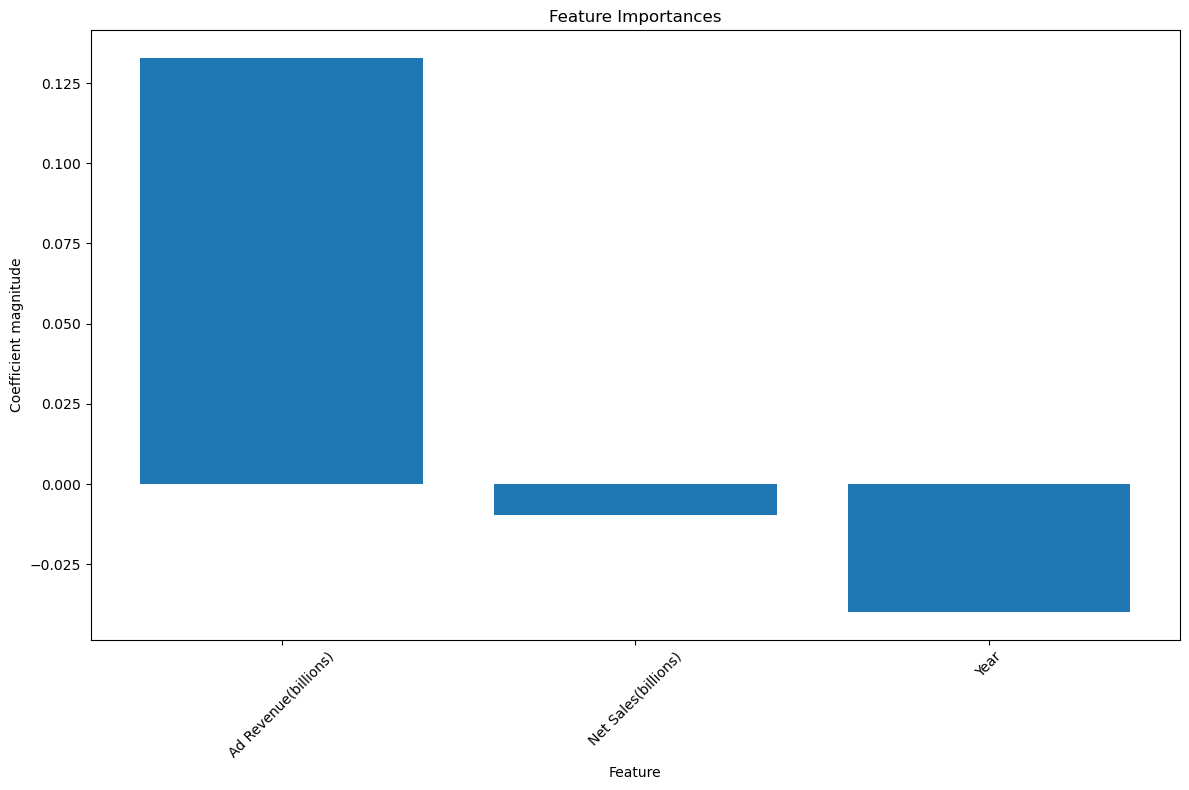

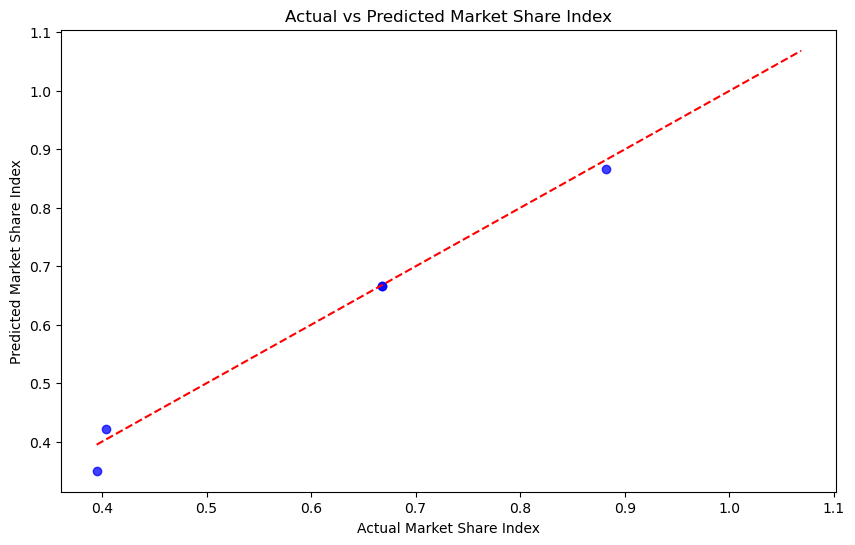

In [5]:
# Strip extra whitespace from the column names
data.columns = data.columns.str.strip()

# Define the market share index
data['Market Share Index'] = data['Retail Sales(billions)'] / data['E-commerce sales(billions)']

# Define features including 'Year'
features = ['Year', 'Net Sales(billions)', 'Ad Revenue(billions)']
X = data[features]
y = data['Market Share Index']

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature importance for Linear Regression can be derived from the coefficients
coefficients = model.coef_
features_importance = zip(features, coefficients)
sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))  # Increased figure size for clarity
plt.title('Feature Importances')
features_sorted, importance_sorted = zip(*sorted_features)
plt.bar(features_sorted, importance_sorted, align='center')
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

# Visualization of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='b')  # alpha helps to see overlapping data
plt.xlabel('Actual Market Share Index')
plt.ylabel('Predicted Market Share Index')
plt.title('Actual vs Predicted Market Share Index')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [ ]:
# Project future values for the features
latest_year = X['Year'].max()
future_years = np.arange(latest_year + 1, latest_year + 6)

# Assume linear growth for projections, replace with your own method
future_projection = pd.DataFrame({
    'Year': future_years,
    'Net Sales(billions)': np.linspace(X['Net Sales(billions)'].iloc[-1], X['Net Sales(billions)'].iloc[-1] * 1.1, 5),
    'Ad Revenue(billions)': np.linspace(X['Ad Revenue(billions)'].iloc[-1], X['Ad Revenue(billions)'].iloc[-1] * 1.1, 5),
})

# Predict the market share index for the projected years
future_projection['Predicted Market Share Index'] = model.predict(future_projection[features])

# Output the projections
print(future_projection)